# Manifolds for Categorical Distribution
Presented by: Steven Lin and Ian Wu


### What is a Categorical Distribution?
A Categorical distribution describes the results of a random variable that can take on one of $K$ categories for $K \in \mathbb{Z}_+$. 

Examples:
- Coin Flipping ($K=2$) - Two possible results: head and tail.
- Die Rolling ($K=6$) - Six possible results: 1, 2, 3, 4, 5, and 6.
<table><tr><tr><table>
<p float="left">
    <td>  <img src="images/coins.png" width="200" /></td>
    <td>  <img src="images/dice.jpeg" width="200" /> </td>
</p>
<tr><table>

### Probability 101
A probability of an event is a real number in the interval $[0,1]$ which describes how likely the event is going to happen. We denote the probability of an event as $P(E)$. $\Omega$ usually denotes the sample space which consists of all possible events. Since all the events are inside, we must have $P(\Omega)=1$.

Examples:
1. A coin toss has two possible outcomes, namely head (H) or tail (T). The sample space is thus $\Omega=\{H,T\}$. For a fair coin, one would expect that $P(H)=0.5=P(T)$. Suppose now we have an unfair coin which gives us tail $90\%$ of the time, then the probability of us getting a head must be $P(H)=1-0.9=0.1$.
2. Since a die has six outcomes, we can write $\Omega=\{1,2,3,4,5,6\}$. If our die is unfair, say the probability of getting $1,2,3,4$ or $5$ is $10\%,20\%,30\%,30$ and $\%10\%$ respectively, then the probability of getting a $6$ must be $1-0.1-0.2-0.3-0.3-0.1=0$.


### The Manifold
- Notice that only $K-1$ probabilities are needed to characterize a $K$-category distribution; becaues all the probabilities must sum to 1, the last probability can be inferred by subtracting the sum of the $K-1$ probabilities from $1$.
- Another way of saying this is that the probabilites $P_i$, which all lie in the interval $[0,1]$, must satisfy the constraint $P_1+\cdots+P_{K}=1$
- The resulting manifold is a **level set** that is known as the standard (k-1)-dimensional regular simplex for a k-category distribution.
- Definition for regular k-simplex:
 $$\Delta^k=\{(x_1,\cdots,x_{k+1})\in\mathbb{R}^{k+1}\vert x_i\geq 0 \text{ for any }i \text{ and }x_1+\cdots+x_{k+1}=1\}$$


### Shape of N-Dimensional Simplex
- A 0-D simplex is a point (Only one category with 100% Accuracy)
- A 1-D simplex is a line from 0 to 1 (Corresponding to the probability of one of the two events)
- A 2-D simplex is a triangle
- A 3-D simplex is a tetrahedron
- An n-D simplex is usually just called an n-simplex.
<center><img src="images/simplex.png" width=650px alt=\"default\"/></center>

### Visualization of the 2D and 3D Manifold
This function plots the regular $k$ simplex as long as $k=2$ or $3$. Note that, technically, a $k$ simplex lives in $\mathbb{R}^{k+1}$ but this function plots the $k$ simplex in $\mathbb{R}^k$. It does this by plotting the first $k$ coordinates in the simplex. 

INFO: Using numpy backend


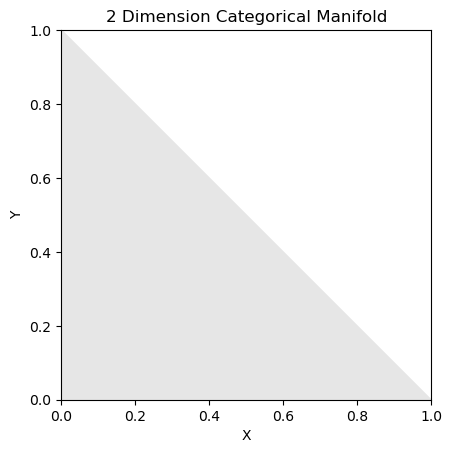

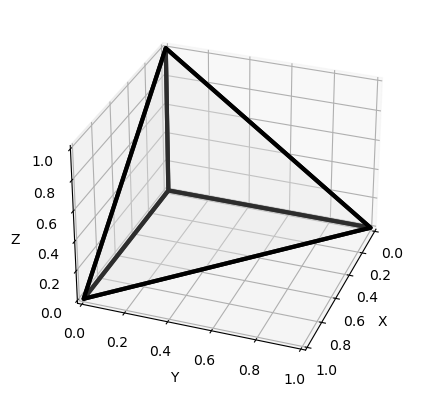

In [1]:
# Plot the Manifold with dimension 2 and 3
import CategoricalDistributionsManifold
import numpy as np
from importlib import reload 
my_module = reload(CategoricalDistributionsManifold)
M2 = CategoricalDistributionsManifold.CategoricalDistributionsManifold(dim = 2)
M3 = CategoricalDistributionsManifold.CategoricalDistributionsManifold(dim = 3)
M2.plot()
M3.plot()

### Visualization of Random Samples over the Manifold

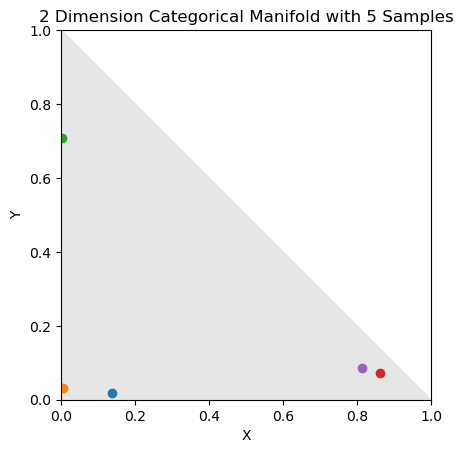

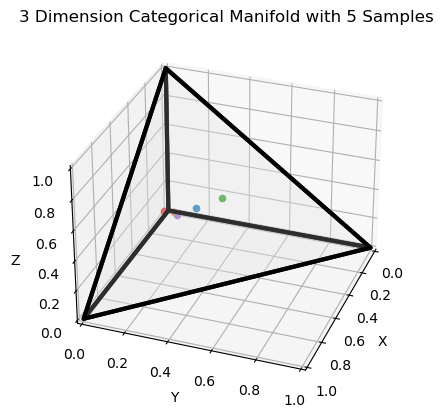

In [2]:
# Plot the 2D and 3D manifold with random points
import CategoricalDistributionsManifold
my_module = reload(CategoricalDistributionsManifold)
M2.scatter(n_samples=5)
M3.scatter(n_samples=5)

### Riemannian Metric on Manifolds of Categorical Distributions 
We endow this manifold with the Fisher metric. More details can be found in this paper: Robert E. Kass. "The Geometry of Asymptotic Inference." Statist. Sci. 4 (3) 188 - 219, August, 1989. https://doi.org/10.1214/ss/1177012480

### Visualization of Exp
Given an initial point and an initial tangent vector, the function gives the output of the exponential function. 

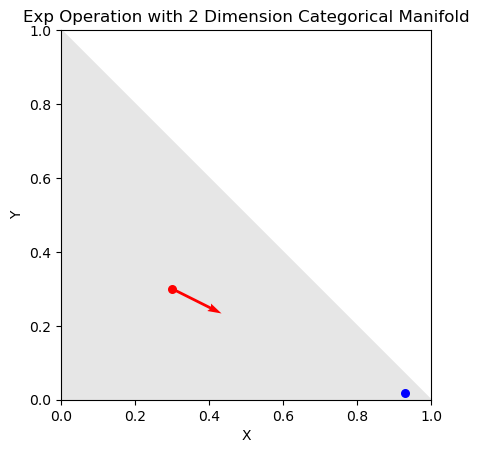

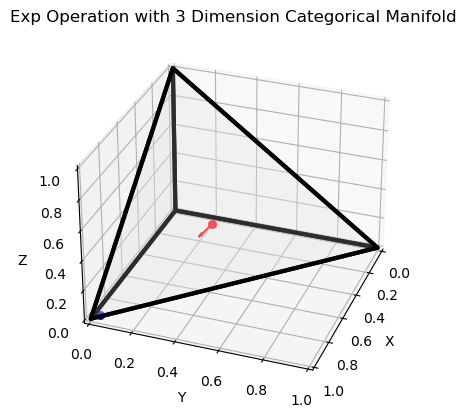

In [3]:
#Visualization of Exp
#%matplotlib widget
from geomstats.information_geometry.categorical import CategoricalDistributions, CategoricalMetric
dist2 = CategoricalDistributions(dim = 2)
vector2 = np.array([1,0,0])
base_point2 = np.array([0.3, 0.3, 0.4])
tangent_vector2 = dist2.to_tangent(vector = vector2, base_point= base_point2)

M2.plot_exp(tangent_vec = tangent_vector2, base_point = base_point2)

dist3 = CategoricalDistributions(dim = 3)
vector3 = np.array([1,0,0,0])
base_point3 = np.array([0.3, 0.3, 0.2, 0.2])
tangent_vector3 = dist3.to_tangent(vector = vector3, base_point= base_point3)

M3.plot_exp(tangent_vec = tangent_vector3, base_point = base_point3)

### Visualization of Geodesics with Initial and End Points Specified
This function plots the geodesic on the manifold with respect to the Fisher metric. Notice that geodesics are not straight lines because the metric is not the Euclidean Metric.

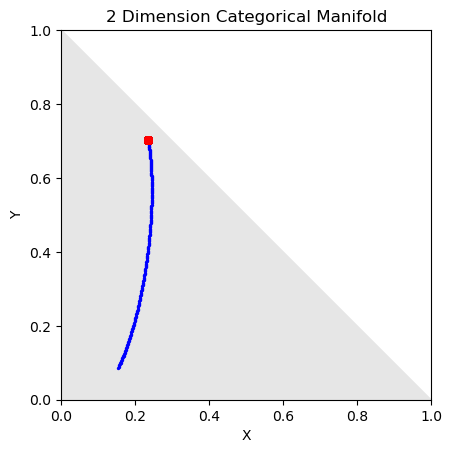

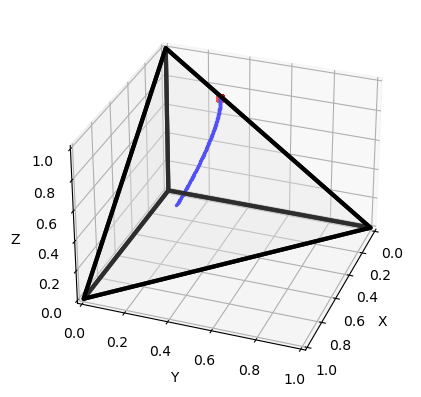

In [4]:
# Plot the manifold with geodesic with initial and end point specified
from geomstats.information_geometry.categorical import CategoricalDistributions, CategoricalMetric
dist2 = CategoricalDistributions(dim = 2)
points2 = dist2.random_point(n_samples = 2)
dist3 = CategoricalDistributions(dim = 3)
points3 = dist2.random_point(n_samples = 2)
# Special Cases (On the boundary)
# points = np.array([[0,0,1], [0,1,0]])
# points = np.array([[0,0,1], [1,0,0]])
# points = np.array([[0.25,0.75,0], [0.75,0.25,0]])
M2.plot_geodesic(initial_point = points2[0], end_point = points2[1])
M3.plot_geodesic(initial_point = points3[0], end_point = points3[1])

### Visualization of Geodesics with Initial Point and Initial Tangent Vector Specified

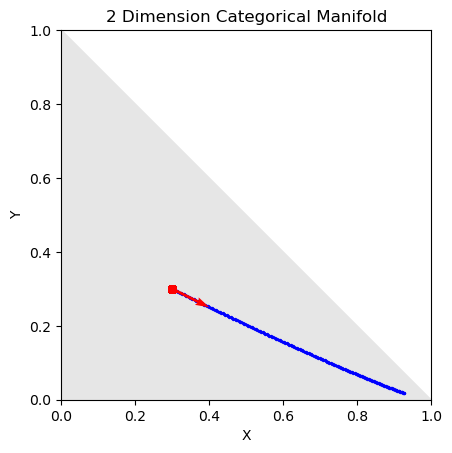

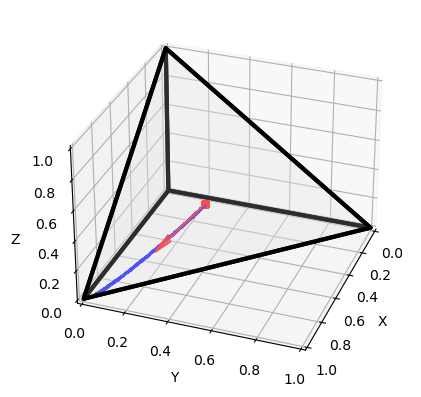

In [5]:
# Plot the manifold with geodesic with initial point and initial tangent_vector specified
dist3 = CategoricalDistributions(dim = 3)
vector2 = np.array([1,0,0])
base_point2 = np.array([0.3, 0.3, 0.4])
tangent_vector2 = dist2.to_tangent(vector = vector2, base_point= base_point2)
M2.plot_geodesic(initial_point = base_point2, tangent_vector = tangent_vector2)

vector3 = np.array([1,0,0,0])
base_point3 = np.array([0.3, 0.3, 0.2, 0.2])
tangent_vector3 = dist3.to_tangent(vector = vector3, base_point= base_point3)
M3.plot_geodesic(initial_point = base_point3, tangent_vector = tangent_vector3)

### Plot the Geodesic Grid for a 2D Manifold

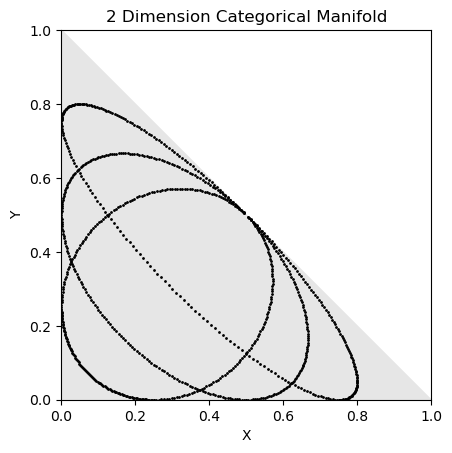

In [6]:
# Geodesic Grid for 2D Manifold
M2.plot_grid()

### Elliptical Geodesic Grid
The geodesics are elliptical because the Fisher metric embeds an n-simplex into an n-hypersphere. 
Intuitively, the geodesics are elliptical because they are the projection of the geodesics on the n-sphere back to the n-simplex.

<center><img src="images/embed.jpeg" width=300px alt=\"default\"/></center>

Image Credit: Åström, F., Petra, S., Schmitzer, B. et al. Image Labeling by Assignment. J Math Imaging Vis 58, 211–238 (2017). https://doi.org/10.1007/s10851-016-0702-4


### Visualization of Log
Given an initial point and an end point, this function plots the tangent vector which when applied to the initial point via the exponential map, we get the endpoint.

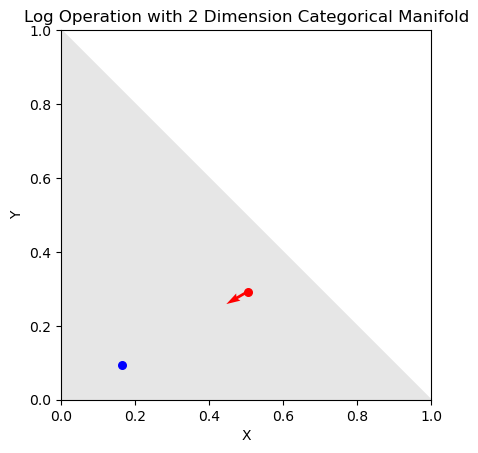

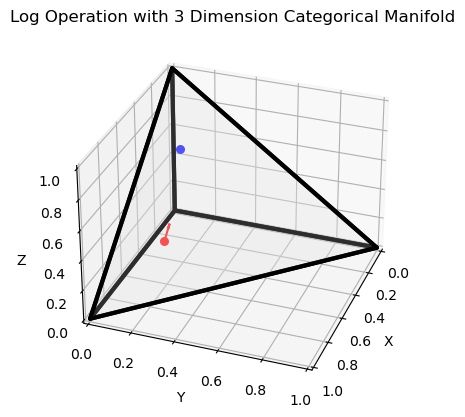

In [7]:
# Visualization of Log
points2 = dist2.random_point(n_samples=2)
M2.plot_log(points2[0],points2[1])

points3 = dist3.random_point(n_samples=3)
M3.plot_log(points3[0],points3[1])


### Applications
#### Questionairre Analysis
Questionaiires often contains categorical data where the user has to select among a few options. Ex. Ethnicity, Nationality, ...


Har-Shemesh, O., Quax, R., Lansing, J.S. et al. Questionnaire data analysis using information geometry. Sci Rep 10, 8633 (2020). https://doi.org/10.1038/s41598-020-63760-8

#### Color Naming
Grass usually looks 'green', and the sky usually looks 'blue' to most of us. But given a color somewhere in the middle, when do we tend to characterize it with 'turquoise'?

This is a categorical distribution with 3 categories.

<center><img src="images/color_naming.png" width=650px alt=\"default\"/></center>

Griffin LD, Mylonas D (2019) Categorical colour geometry. PLoS ONE 14(5): e0216296.https://doi.org/10.1371/journal.pone.0216296


#### Dome Design
The goal is to design a stable dome with some supporting bars, but we only have bars with certain cross-sectional areas to choose from. 

<center><img src="images/dome.jpeg" width=650px alt=\"default\"/></center>

Gao, Huanhuan et al. “Categorical Structural Optimization Using Discrete Manifold Learning Approach and Custom-Built Evolutionary Operators.” Structural and multidisciplinary optimization 58.1 (2018): 215–228. Web.

### Final Thoughts
- This manifold helps us reduce the dimension of a categorical distributions by 1.

- With more constraints or prior information on the distributions, the dimension may be further reduced.

- Applies when the data is constraint to be elements from a finite set.